In [25]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

In [1]:
import numpy as np

In [216]:
def gs_non_norm(V):
    # https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html

    n_vectors = V.shape[0]
    ndim = V.shape[1]
    
    v = np.zeros(shape=(n_vectors, ndim))
    
    for j in range(n_vectors):
        v[j] = V[j]
        
        for k in range(j-1):
            v[j] = v[j] - np.dot(v[k], V[j]) / np.dot(v[k],v[k]) * v[k]
        
    return v

In [262]:
def gs_norm(V):
    # https://www.math.uci.edu/~ttrogdon/105A/html/Lecture23.html

    n_vectors = V.shape[0]
    ndim = V.shape[1]
    
    v = np.zeros(shape=(n_vectors, ndim))
    q = np.zeros(shape=(n_vectors, ndim))
    
    for j in range(n_vectors):
        v[j] = V[j]
        
        for k in range(j-1):
            v[j] = v[j] - np.dot(v[k], V[j]) / np.dot(v[k],v[k]) * v[k]
        
        q[j] = v[j] / np.linalg.norm(v[j])
        
    return q

In [263]:
def gs(V):
    U = np.zeros(V.shape) # DON'T USERS np.zeros_like... it doesn't work!

    n_vectors = V.shape[0]
    ndim = V.shape[1]
    
    for k in range(n_vectors):
        # loop over each input vector
        ans = np.zeros(ndim) # array to store one vector i.e. a matrix of shape (1, ndim)
        for i in range(k):
            # loop over *previous* U vectors
            v = np.dot(V[k], U[i]) / np.dot(U[i], U[i]) * U[i]
            ans += v
        U[k] = V[k] - ans
    return U

In [316]:
def cgs_from_pdf(a):
    #http://iacs-courses.seas.harvard.edu/courses/am205/slides/am205_lec08.pdf

    n_vectors = a.shape[0]
    ndim = a.shape[1]
    
    v = np.zeros(shape=(n_vectors, ndim))
    r = np.zeros(shape=(n_vectors, ndim))
    q = np.zeros(shape=(n_vectors, ndim))
    
    
    for j in range(n_vectors):
        print(f"j = {j}")
        v[j] = a[j]
        
        for i in range(j):
            print(f"i = {i}")
            r[i,j] = np.dot(q[i], a[j])
            v[j] = v[j] - np.dot(r[i,j], q[i])
            
        r[j,j] = np.linalg.norm(v[j])
        q[j] = v[j] / r[j,j]
    
#     return q
    return v

In [317]:
def mgs_from_pdf(a):
    #http://iacs-courses.seas.harvard.edu/courses/am205/slides/am205_lec08.pdf

    n_vectors = a.shape[0]
    ndim = a.shape[1]
    
    v = np.zeros(shape=(n_vectors, ndim))
    r = np.zeros(shape=(n_vectors, ndim))
    q = np.zeros(shape=(n_vectors, ndim))
    
    
    for i in range(n_vectors):
        v[i] = a[i]
        
    for i in range(n_vectors):
        print(f"i = {i}")
        r[i,i] = np.linalg.norm(v[i])
        q[i] = v[i] / r[i,i]
        
        for j in range(i+1, n_vectors):
            print(f"j = {j}")
            r[i,j] = np.dot(q[i], v[j])
            v[j] = v[j] - np.dot(r[i,j], q[i])
    
#     return q
    return v

In [318]:
def compute_Uhat(U):
    """
    given a matrix of vectors computes the unit vector for each row
    """
    n_vectors = U.shape[0]
    
    Uhat = np.zeros(U.shape)
    for k in range(n_vectors):
#         dot = np.dot(U[k], U[k])
#         mag = np.sqrt(dot)
#         Uhat[k] = U[k] / mag
        Uhat[k] = U[k] / np.linalg.norm(U[k])
    return Uhat


In [319]:
x = np.linspace(-1,1,1000)
V = np.array([x**n for n in range(10)])

In [320]:
V.shape

(10, 1000)

In [321]:
q_gs_non_norm = gs_non_norm(V)

In [322]:
q_gs_norm = gs_norm(V)

In [323]:
q_gs = gs(V)

In [324]:
q_cgs = cgs_from_pdf(V)

j = 0
j = 1
i = 0
j = 2
i = 0
i = 1
j = 3
i = 0
i = 1
i = 2
j = 4
i = 0
i = 1
i = 2
i = 3
j = 5
i = 0
i = 1
i = 2
i = 3
i = 4
j = 6
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
j = 7
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
j = 8
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
j = 9
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8


In [325]:
q_mgs = mgs_from_pdf(V)

i = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
i = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
i = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
i = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
i = 4
j = 5
j = 6
j = 7
j = 8
j = 9
i = 5
j = 6
j = 7
j = 8
j = 9
i = 6
j = 7
j = 8
j = 9
i = 7
j = 8
j = 9
i = 8
j = 9
i = 9


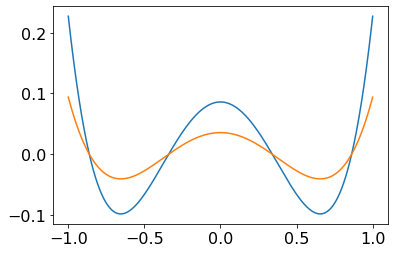

In [326]:
plt.figure()
plt.plot(x, q_gs_non_norm[4])
plt.plot(x, q_gs_norm[4])
# plt.plot(x, q_gs[4], ls='--')


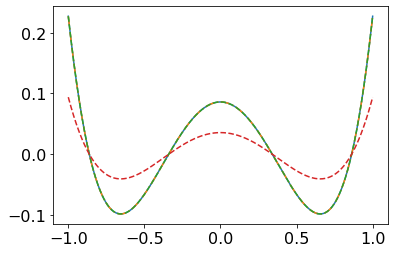

In [327]:
plt.figure()
plt.plot(x, q_gs[4])
plt.plot(x, q_cgs[4], ls='-.')
plt.plot(x, q_mgs[4], ls='--')

plt.plot(x, q_gs_norm[4], ls='--')

In [328]:
np.linalg.cond(q_gs_non_norm)

410.2731318906021

In [329]:
np.linalg.cond(q_gs_norm)

1.0000000000031681

In [330]:
np.linalg.cond(q_gs)

410.2731318906015

In [331]:
np.linalg.cond(q_cgs)

410.2731318906014

In [332]:
np.linalg.cond(q_mgs)

410.27313189060163

In [333]:
np.linalg.cond(compute_Uhat(q_gs_non_norm))

1.0000000000031681

In [334]:
np.linalg.cond(compute_Uhat(q_gs_norm))

1.000000000003168

In [335]:
np.linalg.cond(compute_Uhat(q_gs))

1.0000000000031648

In [336]:
np.linalg.cond(compute_Uhat(q_cgs))

1.0000000000027456

In [337]:
np.linalg.cond(compute_Uhat(q_mgs))

1.0000000000000013

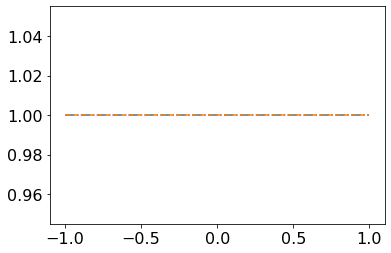

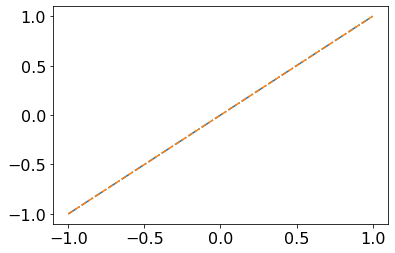

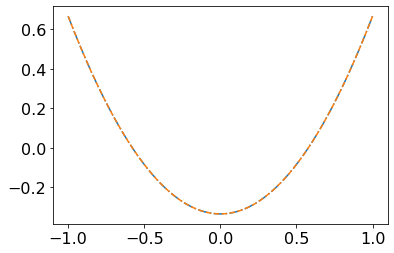

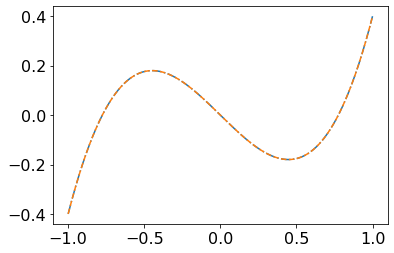

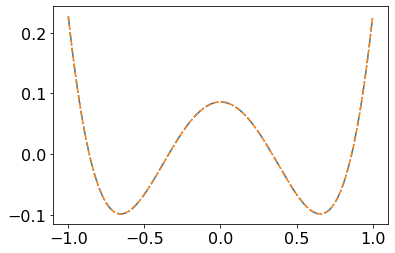

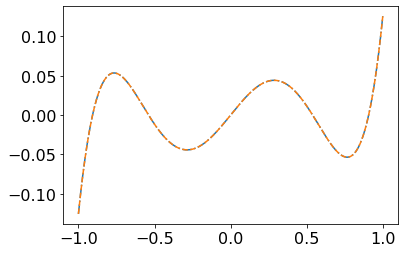

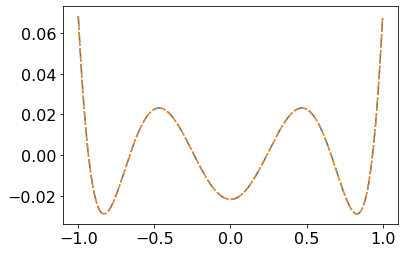

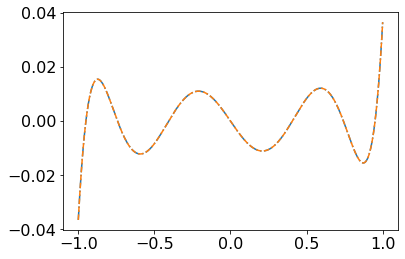

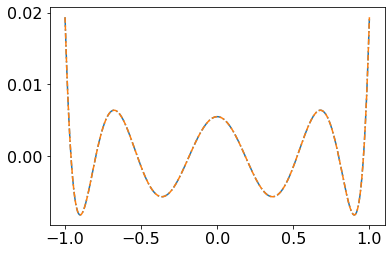

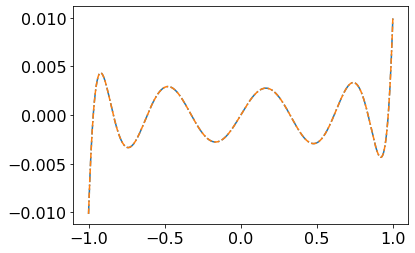

In [338]:
for i in range(len(q_cgs)):
    plt.figure()
    plt.plot(x, q_cgs[i], ls='-.')
    plt.plot(x, q_mgs[i], ls='--')